**Doug Marcum  
DSC 540 - Term Project Milestone 4**  

### Connecting to an API/Pulling in the Data and Cleaning/Formatting  

Perform at least 5 data transformation and/or cleansing steps to your API data. For example: Replace Headers, format data into a more readable format, identify outliers and bad data, find duplicates, fix casing or inconsistent values, conduct Fuzzy Matching.

### Load Libraries and Data

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# needed in order to download data from ArcGIS Online using the ArcGIS API for Python
from arcgis.gis import GIS

Any Item hosted on ArcGIS Online has a unique item ID attribute that can be referenced.

In [2]:
# Item ID for the Toronto Neighbourhoods Boundary File
public_data_item_id = 'af500b5abb7240399853b35a2362d0c0'

Since this data is public, credentials are not needed to access it. If it were a private dataset, we would be required to log in with the following:  

*gis = GIS(username="username", password="password)*

In [3]:
# retrieve an item from ArcGIS Online from a known ID value
known_item = GIS().content.get(public_data_item_id)
known_item

<Item title:"Neighbourhood Crime Rates (Boundary File) " type:Feature Layer Collection owner:TorontoPoliceService>

### Transform Raw Data into a DataFrame

In [4]:
# obtain the first feature layer from the item
fl = known_item.layers[0]

# use the `from_layer` static method in the 'spatial' namespace on the Pandas data frame
sdf = pd.DataFrame.spatial.from_layer(fl)

# return the first 5 records. 
sdf.head()

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length,SHAPE
0,1,Yonge-St.Clair,097,12528,20,29,39,27,34,37,...,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582,"{""rings"": [[[629662.070348966, 4837487.4889266..."
1,2,York University Heights,027,27593,271,296,361,344,357,370,...,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326,"{""rings"": [[[620308.016744937, 4846066.4574399..."
2,3,Lansing-Westgate,038,16164,44,80,68,85,75,72,...,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625,"{""rings"": [[[625561.290588443, 4846350.4188880..."
3,4,Yorkdale-Glen Park,031,14804,106,136,174,161,175,209,...,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920,"{""rings"": [[[625702.12287765, 4840137.07697177..."
4,5,Stonegate-Queensway,016,25051,88,71,76,95,87,82,...,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878,"{""rings"": [[[621554.454563301, 4833597.3633473..."


In [5]:
# quick look at the info of the data
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 61 columns):
OBJECTID                   140 non-null int64
Neighbourhood              140 non-null object
Hood_ID                    140 non-null object
Population                 140 non-null int64
Assault_2014               140 non-null int64
Assault_2015               140 non-null int64
Assault_2016               140 non-null int64
Assault_2017               140 non-null int64
Assault_2018               140 non-null int64
Assault_2019               140 non-null int64
Assault_AVG                140 non-null float64
Assault_CHG                140 non-null float64
Assault_Rate_2019          140 non-null float64
AutoTheft_2014             140 non-null int64
AutoTheft_2015             140 non-null int64
AutoTheft_2016             140 non-null int64
AutoTheft_2017             140 non-null int64
AutoTheft_2018             140 non-null int64
AutoTheft_2019             140 non-null int64
AutoTheft_AVG

### Remove Unnecessary Initial Columns  

With approximately half of the columns not needed for this analysis, they will be dropped. Once joined with the other data frames, new columns will be created. 

In [6]:
# columns before
print('Number of columns before columns dropped:', sdf.shape[1])

Number of columns before columns dropped: 61


In [7]:
# dropping of columns
sdf.drop(sdf.columns[sdf.columns.str.contains('2014')], axis = 1, inplace = True)
sdf.drop(sdf.columns[sdf.columns.str.contains('2015')], axis = 1, inplace = True)
sdf.drop(sdf.columns[sdf.columns.str.contains('AVG')], axis = 1, inplace = True)
sdf.drop(sdf.columns[sdf.columns.str.contains('CHG')], axis = 1, inplace = True)
sdf.drop(sdf.columns[sdf.columns.str.contains('Rate')], axis = 1, inplace = True)
sdf.drop(sdf.columns[sdf.columns.str.contains('ID')], axis = 1, inplace = True)
sdf = sdf.drop(columns=['Shape__Area', 'Shape__Length', 'SHAPE'])

In [8]:
# columns after
print('Number of columns after columns dropped:', sdf.shape[1])

Number of columns after columns dropped: 26


### Modify Header  

Even though this is not the final header, in order to have a clean standardized process until then, the folllowing steps are completed. 

In [9]:
# standardize column names to lowercase
sdf.columns = map(str.lower, sdf.columns)

In [10]:
# 'neighbourhood' changed to 'neighborhood' to avoid possible future typos
# 'population' changed to 'population_2019', to not be confused with other populations from the 2016 data sets
sdf.rename(columns={'neighbourhood': 'neighborhood', 'population': 'population_2019'}, inplace = True)

In [11]:
# quick look at the data
sdf.head()

,neighborhood,population_2019,assault_2016,assault_2017,assault_2018,assault_2019,autotheft_2016,autotheft_2017,autotheft_2018,autotheft_2019,...,homicide_2018,homicide_2019,robbery_2016,robbery_2017,robbery_2018,robbery_2019,theftover_2016,theftover_2017,theftover_2018,theftover_2019
0,Yonge-St.Clair,12528,39,27,34,37,7,2,6,6,...,0,0,6,8,5,4,8,0,3,6
1,York University Heights,27593,361,344,357,370,105,92,92,144,...,1,0,70,75,88,79,37,39,38,28
2,Lansing-Westgate,16164,68,85,75,72,27,26,16,32,...,10,0,9,17,35,11,5,11,6,11
3,Yorkdale-Glen Park,14804,174,161,175,209,41,52,63,61,...,2,1,24,35,44,42,26,23,20,29
4,Stonegate-Queensway,25051,76,95,87,82,12,32,31,34,...,0,0,16,26,25,22,4,6,7,4


### Check For Missing Values

In [12]:
# quick function to look for missing values in each column
def miss_values(df):
    for c in df.columns:
        miss = df[c].isnull().sum() 
        if miss > 0: 
            print(f'Missing value(s) for {c}: {miss}') 
        else: 
            print(f'0 missing values for {c}')

# check if any columns are null
miss_values(sdf)

0 missing values for neighborhood
0 missing values for population_2019
0 missing values for assault_2016
0 missing values for assault_2017
0 missing values for assault_2018
0 missing values for assault_2019
0 missing values for autotheft_2016
0 missing values for autotheft_2017
0 missing values for autotheft_2018
0 missing values for autotheft_2019
0 missing values for breakandenter_2016
0 missing values for breakandenter_2017
0 missing values for breakandenter_2018
0 missing values for breakandenter_2019
0 missing values for homicide_2016
0 missing values for homicide_2017
0 missing values for homicide_2018
0 missing values for homicide_2019
0 missing values for robbery_2016
0 missing values for robbery_2017
0 missing values for robbery_2018
0 missing values for robbery_2019
0 missing values for theftover_2016
0 missing values for theftover_2017
0 missing values for theftover_2018
0 missing values for theftover_2019


### Check For Duplicates  

Knowing that there may be duplicate numbers of incidents from neighborhood to neighborhood, it is still important to make certain there are no duplicate neighborhoods listed.

In [13]:
# look for duplicate neighborhoods being listed
print('Duplicate neighborhoods found:', sdf.neighborhood.duplicated().any())

Duplicate neighborhoods found: False


### Outliers  

Here we plot a number of histograms to look for outliers. Outliers here are not analomalies per se, but rather areas of lower and higher occurrences of crime. This spread is not uncommon in major, metropolitan cities (most areas with lower crime rates, with a small number of areas with excessively higher crime rates). These factors will play a larger role in the next milestone.

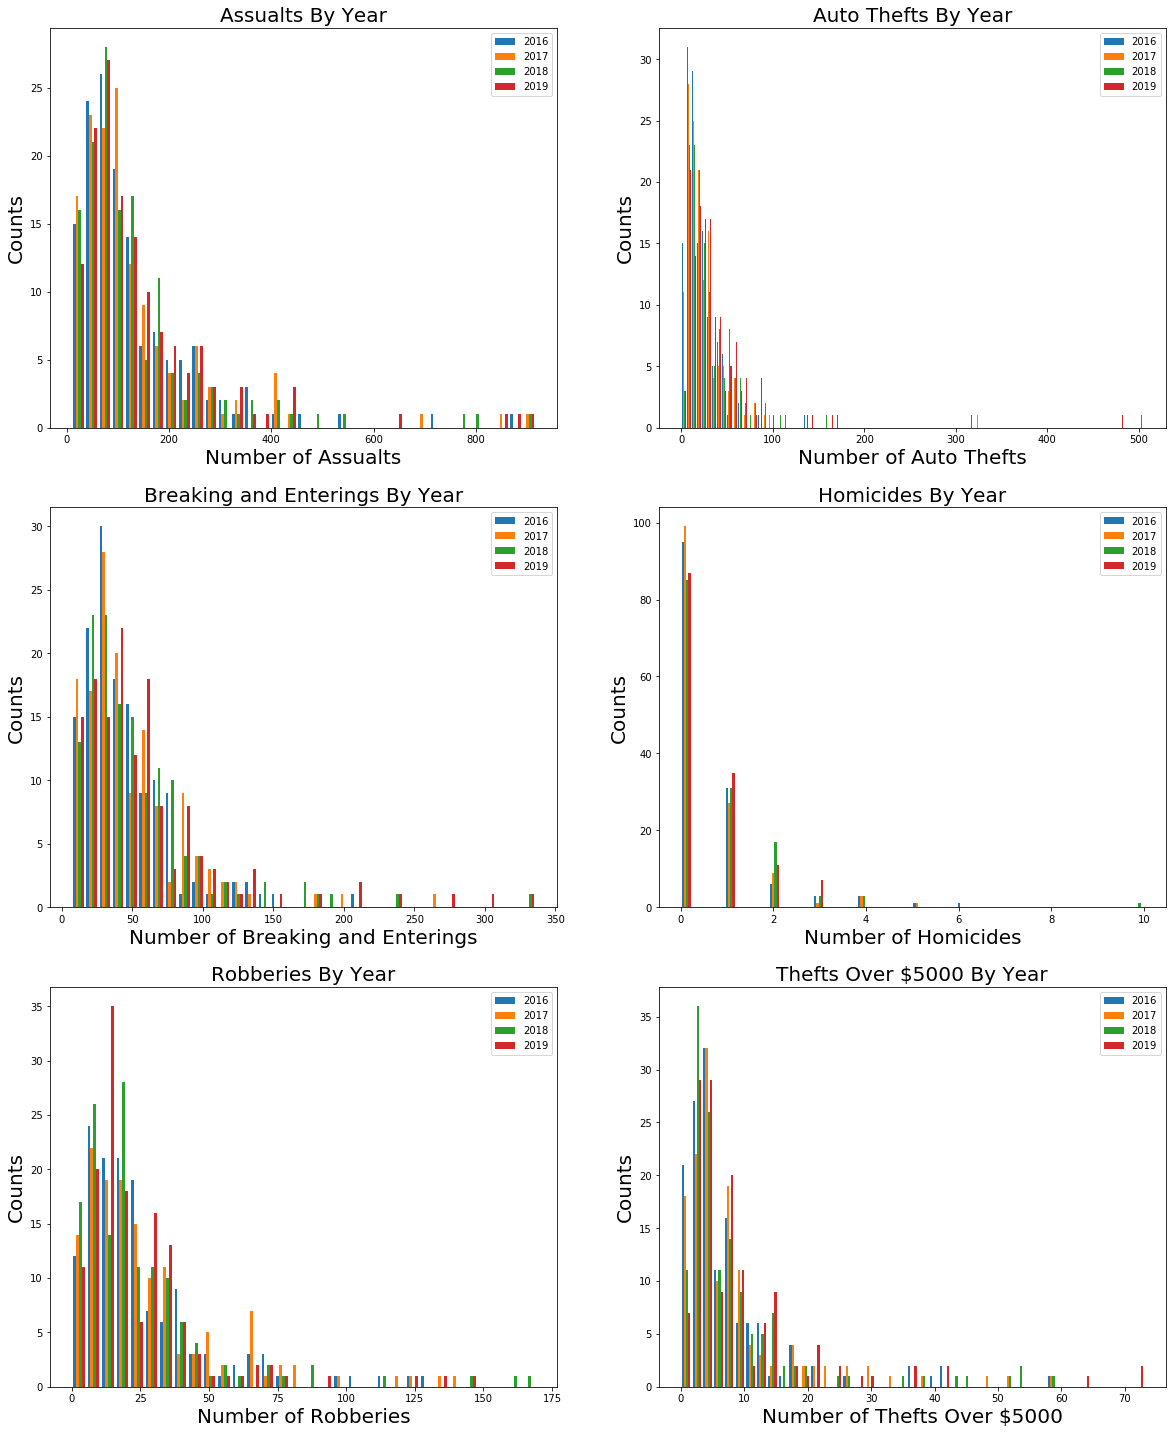

In [14]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# create label
label = ['2016', '2017', '2018', '2019']

# create histograms for observed crimes
axes[0, 0].hist([sdf.assault_2016, sdf.assault_2017, sdf.assault_2018, sdf.assault_2019], bins = 'auto')
axes[0, 0].set_title('Assualts By Year', fontsize=20)
axes[0, 0].set_xlabel('Number of Assualts', fontsize=20)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].legend(label)

axes[0, 1].hist([sdf.autotheft_2016, sdf.autotheft_2017, sdf.autotheft_2018, sdf.autotheft_2019], bins = 'auto')
axes[0, 1].set_title('Auto Thefts By Year', fontsize=20)
axes[0, 1].set_xlabel('Number of Auto Thefts', fontsize=20)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].legend(label)

axes[1, 0].hist([sdf.breakandenter_2016, sdf.breakandenter_2017, sdf.breakandenter_2018, sdf.breakandenter_2019], bins = 'auto')
axes[1, 0].set_title('Breaking and Enterings By Year', fontsize=20)
axes[1, 0].set_xlabel('Number of Breaking and Enterings', fontsize=20)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].legend(label)

axes[1, 1].hist([sdf.homicide_2016, sdf.homicide_2017, sdf.homicide_2018, sdf.homicide_2019], bins = 'auto')
axes[1, 1].set_title('Homicides By Year', fontsize=20)
axes[1, 1].set_xlabel('Number of Homicides', fontsize=20)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].legend(label)

axes[2, 0].hist([sdf.robbery_2016, sdf.robbery_2017, sdf.robbery_2018, sdf.robbery_2019], bins = 'auto')
axes[2, 0].set_title('Robberies By Year', fontsize=20)
axes[2, 0].set_xlabel('Number of Robberies', fontsize=20)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].legend(label)

axes[2, 1].hist([sdf.theftover_2016, sdf.theftover_2017, sdf.theftover_2018, sdf.theftover_2019], bins = 'auto')
axes[2, 1].set_title('Thefts Over $5000 By Year', fontsize=20)
axes[2, 1].set_xlabel('Number of Thefts Over $5000', fontsize=20)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].legend(label)
plt.show()

### Transpose

In [15]:
# since we will be transposing on 'neighborhood', first let us sort the column, making it easier to read alphabetically
sdf.sort_values(by = ['neighborhood'], inplace = True)
sdf.head()

,neighborhood,population_2019,assault_2016,assault_2017,assault_2018,assault_2019,autotheft_2016,autotheft_2017,autotheft_2018,autotheft_2019,...,homicide_2018,homicide_2019,robbery_2016,robbery_2017,robbery_2018,robbery_2019,theftover_2016,theftover_2017,theftover_2018,theftover_2019
79,Agincourt North,29113,77,71,79,79,16,32,42,42,...,0,0,13,22,42,35,5,11,4,2
80,Agincourt South-Malvern West,23757,136,115,114,123,26,35,36,62,...,1,0,21,34,33,29,11,14,10,15
86,Alderwood,12054,39,21,30,36,17,14,25,14,...,0,0,11,6,8,5,10,7,7,7
56,Annex,30526,257,248,246,288,19,23,33,30,...,2,1,34,64,42,31,22,29,45,42
84,Banbury-Don Mills,27695,84,109,77,74,7,16,27,42,...,0,0,21,10,7,10,11,5,8,14


In [16]:
# transpose the data frame and make 'neighborhood' the header
crime = sdf.T
crime.columns = crime.iloc[0]
crime = crime.drop(crime.index[0])
print('Shape:', crime.shape)
crime.head()

Shape: (25, 140)


neighborhood,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
population_2019,29113,23757,12054,30526,27695,15873,25797,21396,13154,23236,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
assault_2016,77,136,39,257,84,64,727,84,35,36,...,97,102,365,79,33,86,73,39,361,174
assault_2017,71,115,21,248,109,51,852,67,33,48,...,92,103,400,75,32,55,73,27,344,161
assault_2018,79,114,30,246,77,58,808,60,49,42,...,107,78,369,101,37,76,78,34,357,175
assault_2019,79,123,36,288,74,50,916,66,45,62,...,112,101,427,98,30,74,103,37,370,209


### Modify New Header

In [17]:
# cleaning of the header to standardize and replace ' ' and '.' with '_'
crime.columns = [x.lower() for x in crime.columns]
crime.columns = [x.replace('.', '_') for x in crime.columns]
crime.columns = [x.replace(' ', '_') for x in crime.columns]
print(crime.columns.values)

['agincourt_north' 'agincourt_south-malvern_west' 'alderwood' 'annex'
 'banbury-don_mills' 'bathurst_manor' 'bay_street_corridor'
 'bayview_village' 'bayview_woods-steeles' 'bedford_park-nortown'
 'beechborough-greenbrook' 'bendale' 'birchcliffe-cliffside' 'black_creek'
 'blake-jones' 'briar_hill-belgravia' 'bridle_path-sunnybrook-york_mills'
 'broadview_north' 'brookhaven-amesbury' 'cabbagetown-south_st_james_town'
 'caledonia-fairbank' 'casa_loma' 'centennial_scarborough'
 'church-yonge_corridor' 'clairlea-birchmount' 'clanton_park' 'cliffcrest'
 'corso_italia-davenport' 'danforth' 'danforth_east_york'
 'don_valley_village' 'dorset_park' 'dovercourt-wallace_emerson-junction'
 'downsview-roding-cfb' 'dufferin_grove' 'east_end-danforth'
 'edenbridge-humber_valley' 'eglinton_east' 'elms-old_rexdale'
 'englemount-lawrence' 'eringate-centennial-west_deane'
 'etobicoke_west_mall' 'flemingdon_park' 'forest_hill_north'
 'forest_hill_south' 'glenfield-jane_heights' 'greenwood-coxwell'
 'guild

In [18]:
# after looking at the column names, there are still an error to correct
# 'weston-pellam_park' should be 'weston-pelham_park' 
crime = crime.rename(columns = {'weston-pellam_park': 'weston-pelham_park'})

### Add Necessary Columns

In [19]:
# reset index, rename index column topic
crime = crime.reset_index()
crime.rename(columns={'index': 'characteristic'}, inplace=True)
crime.head()

,characteristic,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,bay_street_corridor,bayview_village,bayview_woods-steeles,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,population_2019,29113,23757,12054,30526,27695,15873,25797,21396,13154,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
1,assault_2016,77,136,39,257,84,64,727,84,35,...,97,102,365,79,33,86,73,39,361,174
2,assault_2017,71,115,21,248,109,51,852,67,33,...,92,103,400,75,32,55,73,27,344,161
3,assault_2018,79,114,30,246,77,58,808,60,49,...,107,78,369,101,37,76,78,34,357,175
4,assault_2019,79,123,36,288,74,50,916,66,45,...,112,101,427,98,30,74,103,37,370,209


In [20]:
# create a blank series 
cat_new = pd.Series([]) 
  
# run a for loop and assign values to series 
for i in range(len(crime)): 
    if crime['characteristic'][i] == 'population_2019': 
        cat_new[i]= 'Population'
    else: 
        cat_new[i]= 'Crime'
        
# insert new column with values of list made above         
crime.insert(0, 'category', cat_new) 

crime.head() 

,category,characteristic,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,bay_street_corridor,bayview_village,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Population,population_2019,29113,23757,12054,30526,27695,15873,25797,21396,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
1,Crime,assault_2016,77,136,39,257,84,64,727,84,...,97,102,365,79,33,86,73,39,361,174
2,Crime,assault_2017,71,115,21,248,109,51,852,67,...,92,103,400,75,32,55,73,27,344,161
3,Crime,assault_2018,79,114,30,246,77,58,808,60,...,107,78,369,101,37,76,78,34,357,175
4,Crime,assault_2019,79,123,36,288,74,50,916,66,...,112,101,427,98,30,74,103,37,370,209


In [21]:
# create a blank series
topic_new = pd.Series([]) 
  
# run a for loop and assign values to series 
for i in range(len(crime)): 
    if crime['category'][i] == 'Population': 
        topic_new[i]= 'Population and dwellings'
    else: 
        topic_new[i]= 'Crimes by year'
        
# insert new column with values of list made above         
crime.insert(1, "topic", topic_new) 

crime.head() 

,category,topic,characteristic,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,bay_street_corridor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Population,Population and dwellings,population_2019,29113,23757,12054,30526,27695,15873,25797,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
1,Crime,Crimes by year,assault_2016,77,136,39,257,84,64,727,...,97,102,365,79,33,86,73,39,361,174
2,Crime,Crimes by year,assault_2017,71,115,21,248,109,51,852,...,92,103,400,75,32,55,73,27,344,161
3,Crime,Crimes by year,assault_2018,79,114,30,246,77,58,808,...,107,78,369,101,37,76,78,34,357,175
4,Crime,Crimes by year,assault_2019,79,123,36,288,74,50,916,...,112,101,427,98,30,74,103,37,370,209


In [22]:
# create column with sums for total of city of toronto
crime['city_of_toronto']= crime.iloc[:, -140:].sum(axis=1)

# create col_name by popping city_of_toronto
col_name = crime.pop('city_of_toronto')

# insert col_name into crime 4th column location
crime.insert(3, 'city_of_toronto', col_name)

# convert column to integers
crime['city_of_toronto'] = crime['city_of_toronto'].astype(int)

crime.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Population,Population and dwellings,population_2019,2731571,29113,23757,12054,30526,27695,15873,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
1,Crime,Crimes by year,assault_2016,18508,77,136,39,257,84,64,...,97,102,365,79,33,86,73,39,361,174
2,Crime,Crimes by year,assault_2017,18845,71,115,21,248,109,51,...,92,103,400,75,32,55,73,27,344,161
3,Crime,Crimes by year,assault_2018,19451,79,114,30,246,77,58,...,107,78,369,101,37,76,78,34,357,175
4,Crime,Crimes by year,assault_2019,20426,79,123,36,288,74,50,...,112,101,427,98,30,74,103,37,370,209


### Final Missing Values Check

In [23]:
# check if any columns are missing values
miss_values(crime)

0 missing values for category
0 missing values for topic
0 missing values for characteristic
0 missing values for city_of_toronto
0 missing values for agincourt_north
0 missing values for agincourt_south-malvern_west
0 missing values for alderwood
0 missing values for annex
0 missing values for banbury-don_mills
0 missing values for bathurst_manor
0 missing values for bay_street_corridor
0 missing values for bayview_village
0 missing values for bayview_woods-steeles
0 missing values for bedford_park-nortown
0 missing values for beechborough-greenbrook
0 missing values for bendale
0 missing values for birchcliffe-cliffside
0 missing values for black_creek
0 missing values for blake-jones
0 missing values for briar_hill-belgravia
0 missing values for bridle_path-sunnybrook-york_mills
0 missing values for broadview_north
0 missing values for brookhaven-amesbury
0 missing values for cabbagetown-south_st_james_town
0 missing values for caledonia-fairbank
0 missing values for casa_loma
0 mis

In [24]:
# final crime data frame
crime.head()

,category,topic,characteristic,city_of_toronto,agincourt_north,agincourt_south-malvern_west,alderwood,annex,banbury-don_mills,bathurst_manor,...,willowdale_west,willowridge-martingrove-richview,woburn,woodbine_corridor,woodbine-lumsden,wychwood,yonge-eglinton,yonge-st_clair,york_university_heights,yorkdale-glen_park
0,Population,Population and dwellings,population_2019,2731571,29113,23757,12054,30526,27695,15873,...,16936,22156,53485,12541,7865,14349,11817,12528,27593,14804
1,Crime,Crimes by year,assault_2016,18508,77,136,39,257,84,64,...,97,102,365,79,33,86,73,39,361,174
2,Crime,Crimes by year,assault_2017,18845,71,115,21,248,109,51,...,92,103,400,75,32,55,73,27,344,161
3,Crime,Crimes by year,assault_2018,19451,79,114,30,246,77,58,...,107,78,369,101,37,76,78,34,357,175
4,Crime,Crimes by year,assault_2019,20426,79,123,36,288,74,50,...,112,101,427,98,30,74,103,37,370,209


In [25]:
# save to csv for future use
crime.to_csv('crimes_demo.csv', index = False, header = True)